In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from tensorflow import keras
from keras.models import Sequential
from keras import Input
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.callbacks import EarlyStopping

from lightgbm import LGBMRegressor
import random
import xgboost as xgb

In [2]:
curr_dir = os.getcwd()
curr_dir

'C:\\weather\\smart_farm'

In [3]:
forders_tr = os.listdir(curr_dir+"\\data")
forders_tr

['smart_farm.csv']

In [4]:
# train = pd.DataFrame()

# for files in s:
#     df= pd.read_csv(os.path.join(curr_dir+"\\data\\"+"\\fin_train_val\\")+files)
#     train = pd.concat([train, df])
    
# train.drop('idx', axis=1, inplace=True)
# train

In [4]:
df = pd.read_csv(os.path.join(curr_dir+"\\data\\")+forders_tr[0])
df = df.drop(df.columns[0], axis=1)
df

smart_farm.yy  smart_farm.mm  smart_farm.dd  smart_farm.hh  \
0                2021             11             26              0   
1                2021             11             26              0   
2                2021             11             26              0   
3                2021             11             26              0   
4                2021             11             26              0   
...               ...            ...            ...            ...   
152635           2022              3             20             23   
152636           2022              3             20             23   
152637           2022              3             20             23   
152638           2022              3             20             23   
152639           2022              3             20             23   

        smart_farm.nn  smart_farm.insolation  smart_farm.out_tmperature  \
0                   0                   -2.7                        5.8   
1                   1                   -2.9                        5.8   
2                   2                   -3.0                        5.7   
3                   3                   -3.0                        5.7   
4                   4                   -2.8                        5.7   
...               ...                    ...                        ...   
152635             55                   -3.0                        6.2   
152636             56                   -3.2                        6.2   
152637             57                   -3.2                        6.1   
152638             58                   -3.3                        6.1   
152639             59                   -3.3                        6.1   

        smart_farm.out_humidity  smart_farm.wind_speed  \
0                            67                    0.0   
1                            67                    0.4   
2                            67                    0.9   
3                            67                    1.3   
4                            67                    0.9   
...                         ...                    ...   
152635                       61                    0.4   
152636                       61                    0.0   
152637                       61                    0.4   
152638                       61                    0.4   
152639                       62                    0.0   

        smart_farm.wind_direction  ...  smart_farm.shield_tmperature_h  \
0                             325  ...                             0.0   
1                             344  ...                             0.0   
2                             105  ...                             0.0   
3                             123  ...                             0.0   
4                             123  ...                             0.0   
...                           ...  ...                             ...   
152635                        344  ...                             0.0   
152636                        344  ...                             0.0   
152637                        344  ...                             0.0   
152638                        346  ...                             0.0   
152639                        346  ...                             0.0   

        smart_farm.shield_energy_h  smart_farm.shield_energy_v  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              0.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
152635                         0.0                         0.0   
152636                         0.0                         0.0   
152637                         0.0                         0.0   
152638              

In [5]:
df2022 = df[df['smart_farm.yy']==2022]
df2022
df202203 = df2022[df2022['smart_farm.mm']==3]
df202203
# test = test.reset_index()
# test = test.drop('index', axis=1)
# test

smart_farm.yy  smart_farm.mm  smart_farm.dd  smart_farm.hh  \
132480           2022              3              4              0   
132481           2022              3              4              0   
132482           2022              3              4              0   
132483           2022              3              4              0   
132484           2022              3              4              0   
...               ...            ...            ...            ...   
152635           2022              3             20             23   
152636           2022              3             20             23   
152637           2022              3             20             23   
152638           2022              3             20             23   
152639           2022              3             20             23   

        smart_farm.nn  smart_farm.insolation  smart_farm.out_tmperature  \
132480              0                   -4.0                        2.0   
132481              1                   -4.1                        2.0   
132482              2                   -4.1                        1.9   
132483              3                   -4.1                        1.9   
132484              4                   -4.2                        1.9   
...               ...                    ...                        ...   
152635             55                   -3.0                        6.2   
152636             56                   -3.2                        6.2   
152637             57                   -3.2                        6.1   
152638             58                   -3.3                        6.1   
152639             59                   -3.3                        6.1   

        smart_farm.out_humidity  smart_farm.wind_speed  \
132480                       76                    0.0   
132481                       76                    0.4   
132482                       76                    0.0   
132483                       76                    0.0   
132484                       76                    0.0   
...                         ...                    ...   
152635                       61                    0.4   
152636                       61                    0.0   
152637                       61                    0.4   
152638                       61                    0.4   
152639                       62                    0.0   

        smart_farm.wind_direction  ...  smart_farm.shield_tmperature_h  \
132480                          5  ...                             0.0   
132481                          5  ...                             0.0   
132482                          5  ...                             0.0   
132483                          5  ...                             0.0   
132484                          5  ...                             0.0   
...                           ...  ...                             ...   
152635                        344  ...                             0.0   
152636                        344  ...                             0.0   
152637                        344  ...                             0.0   
152638                        346  ...                             0.0   
152639                        346  ...                             0.0   

        smart_farm.shield_energy_h  smart_farm.shield_energy_v  \
132480                         0.0                         0.0   
132481                         0.0                         0.0   
132482                         0.0                         0.0   
132483                         0.0                         0.0   
132484                         0.0                         0.0   
...                            ...                         ...   
152635                         0.0                         0.0   
152636                         0.0                         0.0   
152637                         0.0                         0.0   
152638              

In [6]:
train = df.iloc[:132480]
train = train.reset_index()
train = train.drop('index', axis=1)

test = df.iloc[132480:]
test = test[test['smart_farm.dd']!=15]        # 15일자 제외
test = test.reset_index()
test = test.drop('index', axis=1)
test

smart_farm.yy  smart_farm.mm  smart_farm.dd  smart_farm.hh  \
0               2022              3              4              0   
1               2022              3              4              0   
2               2022              3              4              0   
3               2022              3              4              0   
4               2022              3              4              0   
...              ...            ...            ...            ...   
18715           2022              3             20             23   
18716           2022              3             20             23   
18717           2022              3             20             23   
18718           2022              3             20             23   
18719           2022              3             20             23   

       smart_farm.nn  smart_farm.insolation  smart_farm.out_tmperature  \
0                  0                   -4.0                        2.0   
1                  1                   -4.1                        2.0   
2                  2                   -4.1                        1.9   
3                  3                   -4.1                        1.9   
4                  4                   -4.2                        1.9   
...              ...                    ...                        ...   
18715             55                   -3.0                        6.2   
18716             56                   -3.2                        6.2   
18717             57                   -3.2                        6.1   
18718             58                   -3.3                        6.1   
18719             59                   -3.3                        6.1   

       smart_farm.out_humidity  smart_farm.wind_speed  \
0                           76                    0.0   
1                           76                    0.4   
2                           76                    0.0   
3                           76                    0.0   
4                           76                    0.0   
...                        ...                    ...   
18715                       61                    0.4   
18716                       61                    0.0   
18717                       61                    0.4   
18718                       61                    0.4   
18719                       62                    0.0   

       smart_farm.wind_direction  ...  smart_farm.shield_tmperature_h  \
0                              5  ...                             0.0   
1                              5  ...                             0.0   
2                              5  ...                             0.0   
3                              5  ...                             0.0   
4                              5  ...                             0.0   
...                          ...  ...                             ...   
18715                        344  ...                             0.0   
18716                        344  ...                             0.0   
18717                        344  ...                             0.0   
18718                        346  ...                             0.0   
18719                        346  ...                             0.0   

       smart_farm.shield_energy_h  smart_farm.shield_energy_v  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         0.0   
...                           ...                         ...   
18715                         0.0                         0.0   
18716                         0.0                         0.0   
18717                         0.0                         0.0   
18718                         0.0                         0.0   
18719       

In [7]:
# mask = train.isna()
# train1 = train[~mask]
# train1.info()
train1 = train.dropna(axis=0)
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130816 entries, 0 to 132479
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   smart_farm.yy                               130816 non-null  int64  
 1   smart_farm.mm                               130816 non-null  int64  
 2   smart_farm.dd                               130816 non-null  int64  
 3   smart_farm.hh                               130816 non-null  int64  
 4   smart_farm.nn                               130816 non-null  int64  
 5   smart_farm.insolation                       130816 non-null  float64
 6   smart_farm.out_tmperature                   130816 non-null  float64
 7   smart_farm.out_humidity                     130816 non-null  int64  
 8   smart_farm.wind_speed                       130816 non-null  float64
 9   smart_farm.wind_direction                   130816 non-null  int64  
 

<AxesSubplot:>

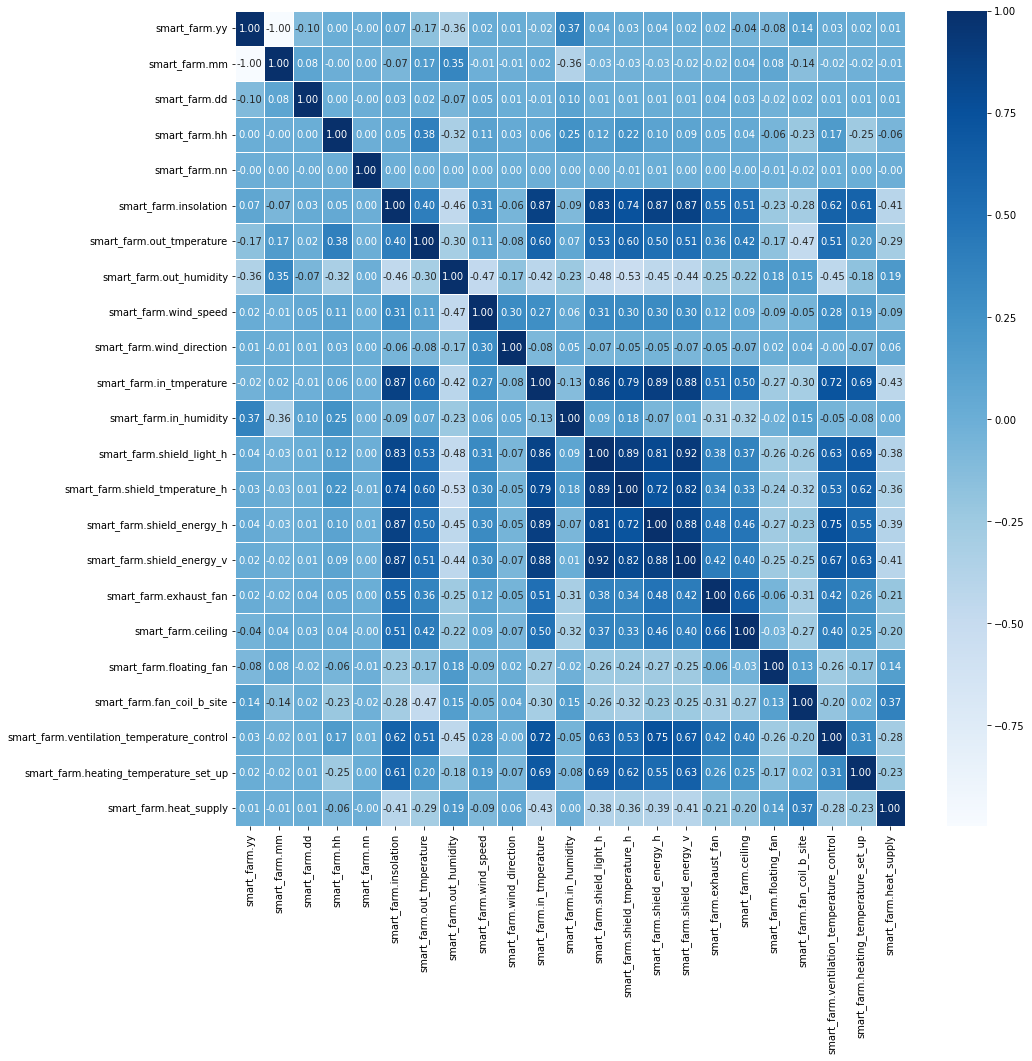

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(data = train1.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [10]:
test.columns

Index(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',
       'smart_farm.nn', 'smart_farm.insolation', 'smart_farm.out_tmperature',
       'smart_farm.out_humidity', 'smart_farm.wind_speed',
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',
       'smart_farm.in_humidity', 'smart_farm.shield_light_h',
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',
       'smart_farm.ceiling', 'smart_farm.floating_fan',
       'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [11]:
'smart_farm.insolation','smart_farm.in_tmperature', 'smart_farm.shield_light_h','smart_farm.shield_tmperature_h', \
'smart_farm.shield_energy_h','smart_farm.shield_energy_v','smart_farm.fan_coil_b_site'

('smart_farm.insolation',
 'smart_farm.in_tmperature',
 'smart_farm.shield_light_h',
 'smart_farm.shield_tmperature_h',
 'smart_farm.shield_energy_h',
 'smart_farm.shield_energy_v',
 'smart_farm.fan_coil_b_site')

In [8]:
test1 = test.interpolate(method ='linear') 
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18720 entries, 0 to 18719
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   smart_farm.yy                               18720 non-null  int64  
 1   smart_farm.mm                               18720 non-null  int64  
 2   smart_farm.dd                               18720 non-null  int64  
 3   smart_farm.hh                               18720 non-null  int64  
 4   smart_farm.nn                               18720 non-null  int64  
 5   smart_farm.insolation                       18720 non-null  float64
 6   smart_farm.out_tmperature                   18720 non-null  float64
 7   smart_farm.out_humidity                     18720 non-null  int64  
 8   smart_farm.wind_speed                       18720 non-null  float64
 9   smart_farm.wind_direction                   18720 non-null  int64  
 10  smart_farm

In [14]:
# 너무 빗나가는게 많았음.
train_normal = (train1 - train1.mean())/train1.std()
train_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130816 entries, 0 to 132479
Data columns (total 23 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   smart_farm.yy                               130816 non-null  float64
 1   smart_farm.mm                               130816 non-null  float64
 2   smart_farm.dd                               130816 non-null  float64
 3   smart_farm.hh                               130816 non-null  float64
 4   smart_farm.nn                               130816 non-null  float64
 5   smart_farm.insolation                       130816 non-null  float64
 6   smart_farm.out_tmperature                   130816 non-null  float64
 7   smart_farm.out_humidity                     130816 non-null  float64
 8   smart_farm.wind_speed                       130816 non-null  float64
 9   smart_farm.wind_direction                   130816 non-null  float64
 

In [15]:
test_normal = (test1 - test1.mean())/test1.std()
test_normal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18720 entries, 0 to 18719
Data columns (total 23 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   smart_farm.yy                               0 non-null      float64
 1   smart_farm.mm                               0 non-null      float64
 2   smart_farm.dd                               18720 non-null  float64
 3   smart_farm.hh                               18720 non-null  float64
 4   smart_farm.nn                               18720 non-null  float64
 5   smart_farm.insolation                       18720 non-null  float64
 6   smart_farm.out_tmperature                   18720 non-null  float64
 7   smart_farm.out_humidity                     18720 non-null  float64
 8   smart_farm.wind_speed                       18720 non-null  float64
 9   smart_farm.wind_direction                   18720 non-null  float64
 10  smart_farm

In [16]:
submission = pd.read_csv('2-1_검증데이터셋.csv')
submission1 = submission.copy()
submission1             # "년도 월 일 시 분 => 년도 월 일"  예측

yy  mm  dd  heat_supply_day1  heat_supply_day2
0   2022   3   4               NaN               NaN
1   2022   3   5               NaN               NaN
2   2022   3   6               NaN               NaN
3   2022   3   7               NaN               NaN
4   2022   3   8               NaN               NaN
5   2022   3   9               NaN               NaN
6   2022   3  10               NaN               NaN
7   2022   3  11               NaN               NaN
8   2022   3  12               NaN               NaN
9   2022   3  13               NaN               NaN
10  2022   3  18               NaN               NaN
11  2022   3  19               NaN               NaN
12  2022   3  20               NaN               NaN

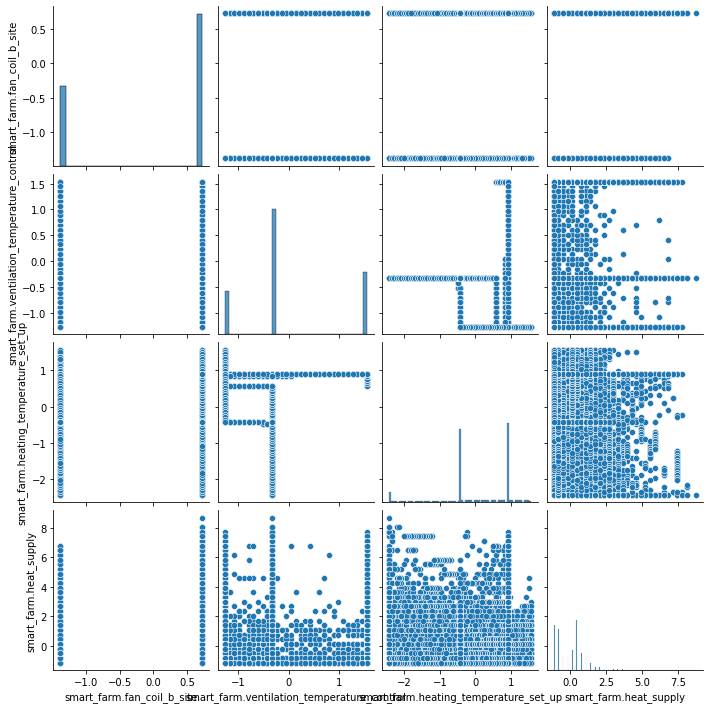

In [17]:
import seaborn as sns          # 열 공급량 무슨 관계?       # set_up
sns.pairplot(train_normal[['smart_farm.fan_coil_b_site',\
       'smart_farm.ventilation_temperature_control',\
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply']])

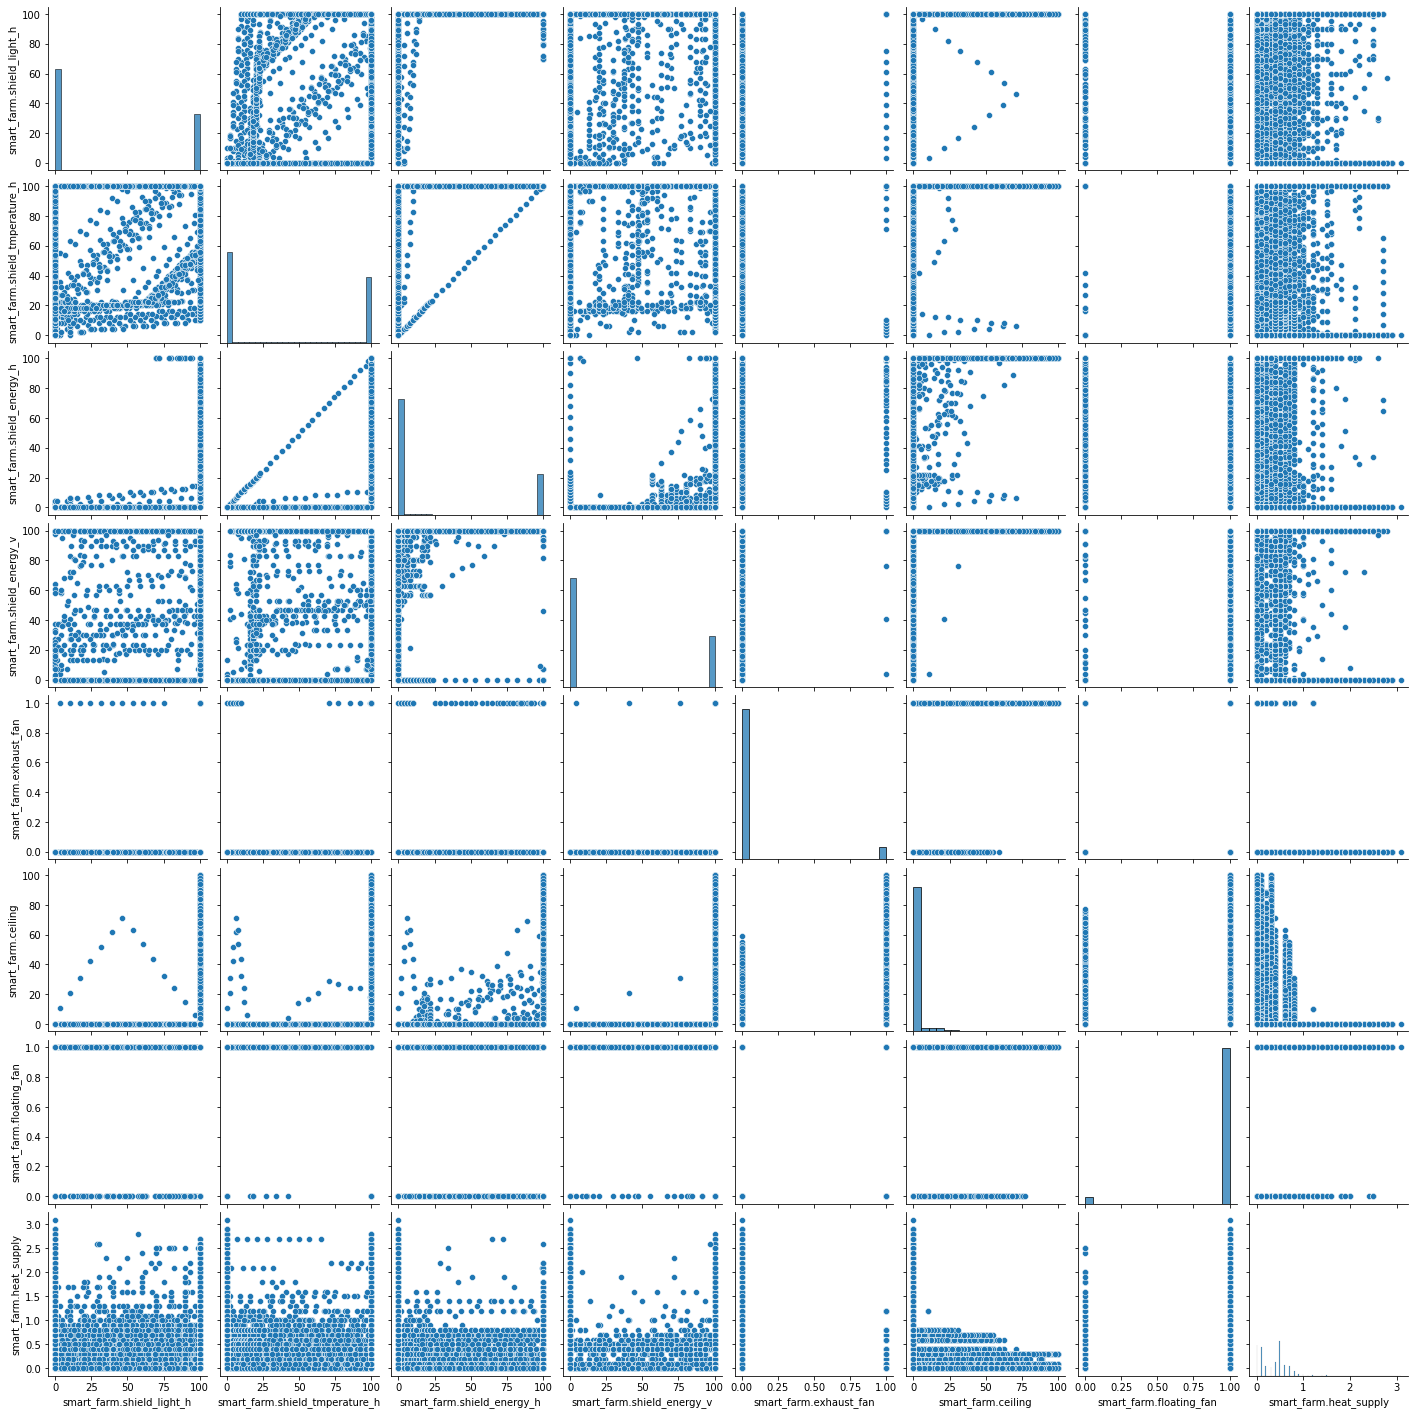

In [54]:
sns.pairplot(train[['smart_farm.shield_light_h',\
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',\
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',\
       'smart_farm.ceiling', 'smart_farm.floating_fan','smart_farm.heat_supply']])

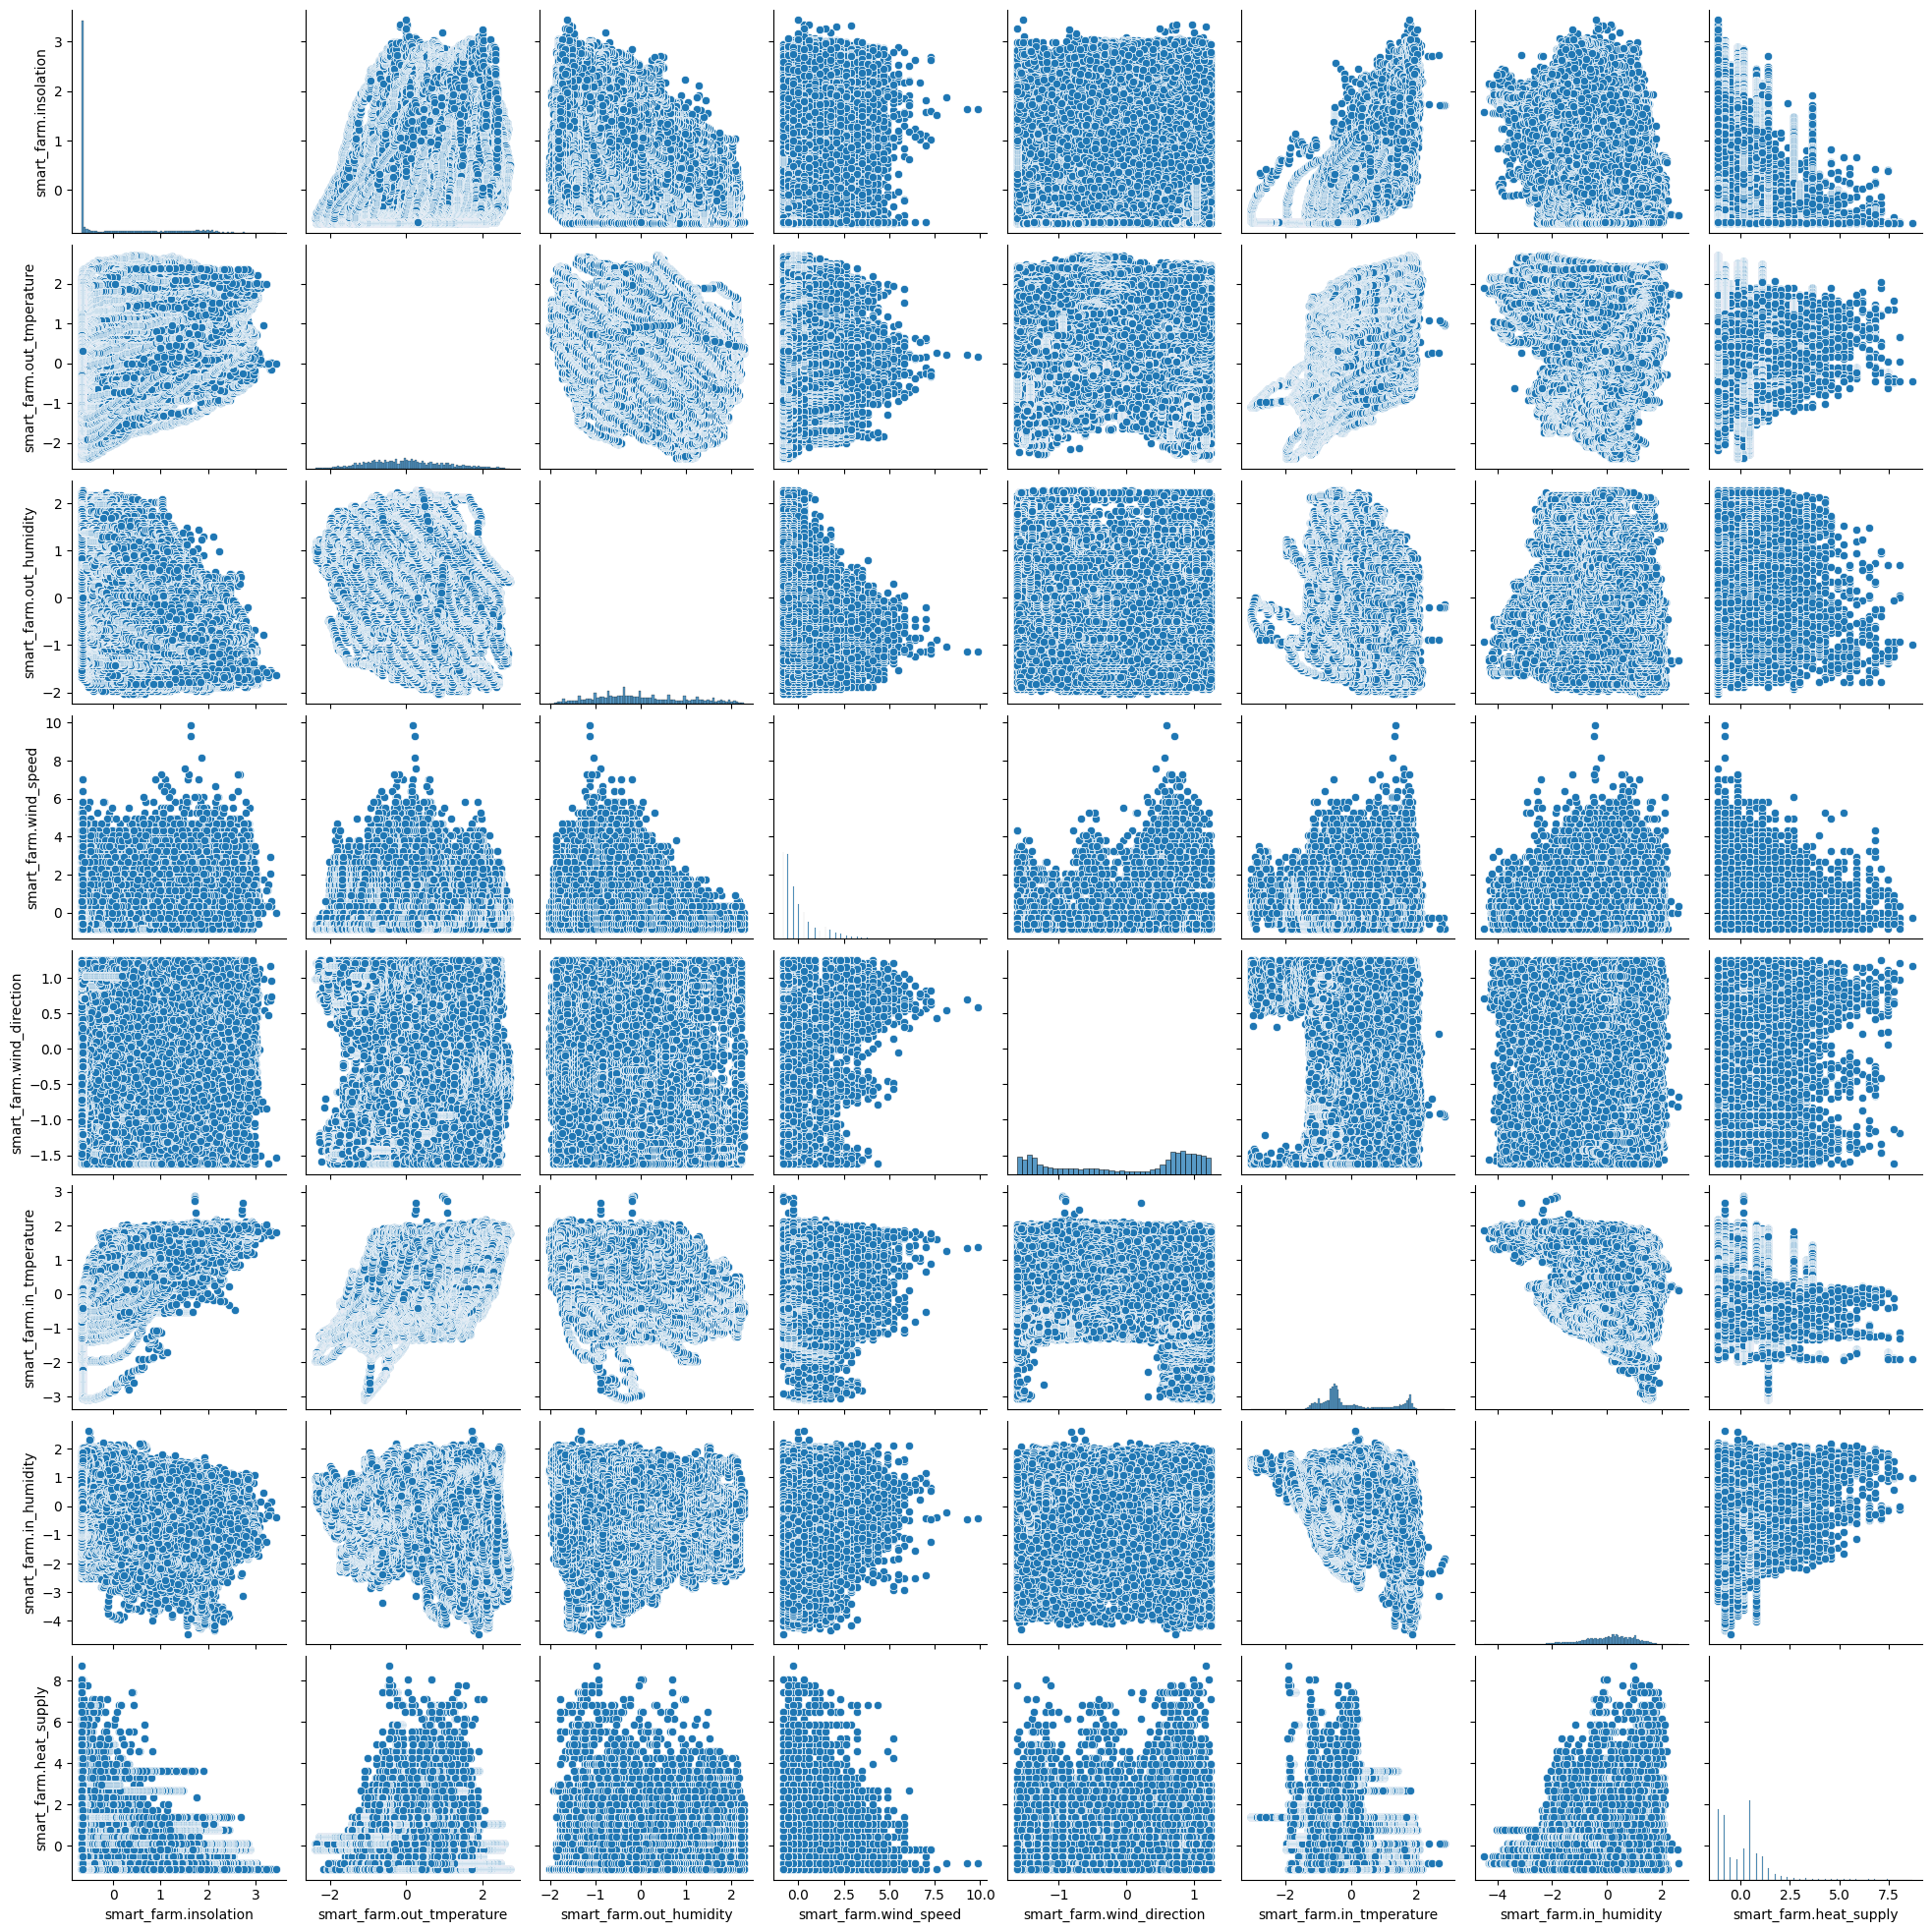

In [18]:
sns.pairplot(train_normal[['smart_farm.insolation', 'smart_farm.out_tmperature',\
       'smart_farm.out_humidity', 'smart_farm.wind_speed',\
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',\
       'smart_farm.in_humidity','smart_farm.heat_supply']])

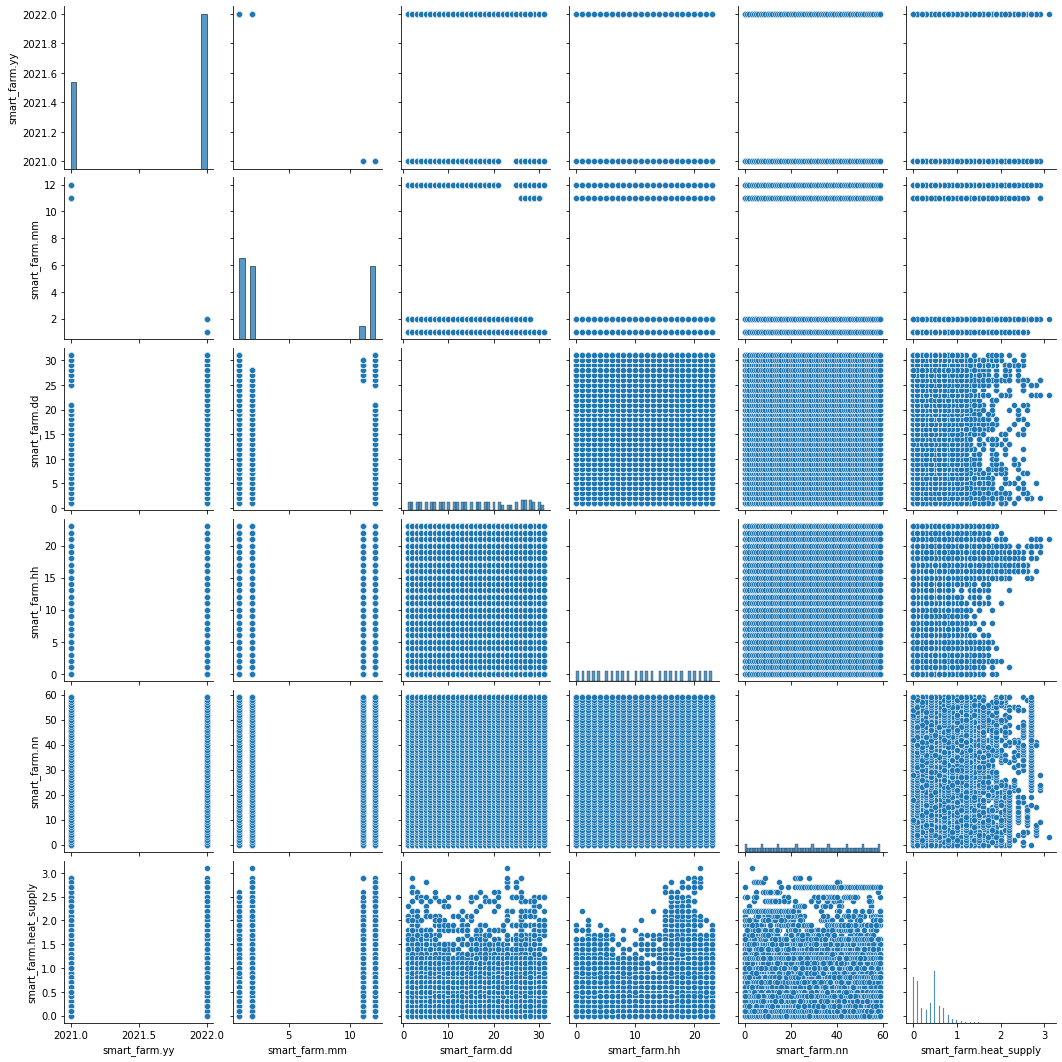

In [56]:
sns.pairplot(train[['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',\
       'smart_farm.nn','smart_farm.heat_supply']])

# Model

In [49]:
train.columns

Index(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh',
       'smart_farm.nn', 'smart_farm.insolation', 'smart_farm.out_tmperature',
       'smart_farm.out_humidity', 'smart_farm.wind_speed',
       'smart_farm.wind_direction', 'smart_farm.in_tmperature',
       'smart_farm.in_humidity', 'smart_farm.shield_light_h',
       'smart_farm.shield_tmperature_h', 'smart_farm.shield_energy_h',
       'smart_farm.shield_energy_v', 'smart_farm.exhaust_fan',
       'smart_farm.ceiling', 'smart_farm.floating_fan',
       'smart_farm.fan_coil_b_site',
       'smart_farm.ventilation_temperature_control',
       'smart_farm.heating_temperature_set_up', 'smart_farm.heat_supply'],
      dtype='object')

In [120]:
# max_depth = 5
# n_estimators = 5000             # 400  #1000
# lr = 0.01             # 0.017
# num_leaves = 100
# early_stopping_rounds = 300      # 100
# verbose = True                  # True

In [121]:
'smart_farm.insolation','smart_farm.in_tmperature', 'smart_farm.shield_light_h','smart_farm.shield_tmperature_h', \
'smart_farm.shield_energy_h','smart_farm.shield_energy_v','smart_farm.fan_coil_b_site'

('smart_farm.insolation',
 'smart_farm.in_tmperature',
 'smart_farm.shield_light_h',
 'smart_farm.shield_tmperature_h',
 'smart_farm.shield_energy_h',
 'smart_farm.shield_energy_v',
 'smart_farm.fan_coil_b_site')

In [41]:
# 결측치 제거한 train1,test1에 대해서
# X = train1.drop('smart_farm.heat_supply', axis=1)
# X = train1[['smart_farm.insolation','smart_farm.wind_speed','smart_farm.in_humidity']]
X = train_normal.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh','smart_farm.nn','smart_farm.heat_supply'], axis=1)
y = train1[['smart_farm.heat_supply']].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# X_test = test1.drop('smart_farm.heat_supply', axis=1)
# X_test = test1[['smart_farm.insolation','smart_farm.wind_speed','smart_farm.in_humidity']]
X_test = test1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh','smart_farm.nn','smart_farm.heat_supply'], axis=1)

In [42]:
# # 결측치 제거한 train1,test1에 대해서
# X = train1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'], axis=1)
# y = train1[['smart_farm.heat_supply']].values

# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3)

# X_test = test1.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'],axis=1)

In [43]:
# X_train = train.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'], axis=1)
# X_val = val.drop(['smart_farm.yy', 'smart_farm.mm', 'smart_farm.dd', 'smart_farm.hh', 'smart_farm.nn', 'smart_farm.heat_supply'],axis=1)

# y_train = train[['smart_farm.heat_supply']].values
# y_val = val[['smart_farm.heat_supply']].values

# lgbm_reg = LGBMRegressor(objective= "regression",
#                      max_depth= max_depth,
#                      n_estimators= n_estimators,
#                      learning_rate= lr,
#                      num_leaves = num_leaves)
    
# lgbm_reg.fit(X_train, y_train,
#           eval_set=[(X_val, y_val)],
#           eval_metric=["mse"],
#           early_stopping_rounds=early_stopping_rounds,
#           verbose=verbose) 

xgb_model = xgb.XGBRegressor(n_estimators = 2000, learning_rate = 0.01, max_depth=11, subsample=0.5,colsample_bytree=0.7, random_state = 2000)

xgb_model.fit(X_train,y_train, eval_set=[(X_val, y_val)], early_stopping_rounds=15)


[0]	validation_0-rmse:0.34216
[1]	validation_0-rmse:0.34036


C:\Users\wjd72\anaconda3\envs\tensorflow_env\lib\site-packages\xgboost\sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:0.33864
[3]	validation_0-rmse:0.33698
[4]	validation_0-rmse:0.33534
[5]	validation_0-rmse:0.33379
[6]	validation_0-rmse:0.33217
[7]	validation_0-rmse:0.33056
[8]	validation_0-rmse:0.32885
[9]	validation_0-rmse:0.32733
[10]	validation_0-rmse:0.32577
[11]	validation_0-rmse:0.32429
[12]	validation_0-rmse:0.32287
[13]	validation_0-rmse:0.32133
[14]	validation_0-rmse:0.31993
[15]	validation_0-rmse:0.31858
[16]	validation_0-rmse:0.31699
[17]	validation_0-rmse:0.31554
[18]	validation_0-rmse:0.31412
[19]	validation_0-rmse:0.31264
[20]	validation_0-rmse:0.31129
[21]	validation_0-rmse:0.31000
[22]	validation_0-rmse:0.30866
[23]	validation_0-rmse:0.30743
[24]	validation_0-rmse:0.30613
[25]	validation_0-rmse:0.30494
[26]	validation_0-rmse:0.30369
[27]	validation_0-rmse:0.30242
[28]	validation_0-rmse:0.30120
[29]	validation_0-rmse:0.30004
[30]	validation_0-rmse:0.29882
[31]	validation_0-rmse:0.29770
[32]	validation_0-rmse:0.29641
[33]	validation_0-rmse:0.29522
[34]	validation_

[262]	validation_0-rmse:0.21423
[263]	validation_0-rmse:0.21416
[264]	validation_0-rmse:0.21407
[265]	validation_0-rmse:0.21401
[266]	validation_0-rmse:0.21397
[267]	validation_0-rmse:0.21389
[268]	validation_0-rmse:0.21378
[269]	validation_0-rmse:0.21371
[270]	validation_0-rmse:0.21365
[271]	validation_0-rmse:0.21359
[272]	validation_0-rmse:0.21354
[273]	validation_0-rmse:0.21351
[274]	validation_0-rmse:0.21347
[275]	validation_0-rmse:0.21340
[276]	validation_0-rmse:0.21335
[277]	validation_0-rmse:0.21331
[278]	validation_0-rmse:0.21324
[279]	validation_0-rmse:0.21317
[280]	validation_0-rmse:0.21311
[281]	validation_0-rmse:0.21303
[282]	validation_0-rmse:0.21293
[283]	validation_0-rmse:0.21281
[284]	validation_0-rmse:0.21277
[285]	validation_0-rmse:0.21271
[286]	validation_0-rmse:0.21267
[287]	validation_0-rmse:0.21263
[288]	validation_0-rmse:0.21258
[289]	validation_0-rmse:0.21255
[290]	validation_0-rmse:0.21247
[291]	validation_0-rmse:0.21240
[292]	validation_0-rmse:0.21232
[293]	va

[519]	validation_0-rmse:0.20578
[520]	validation_0-rmse:0.20577
[521]	validation_0-rmse:0.20576
[522]	validation_0-rmse:0.20574
[523]	validation_0-rmse:0.20573
[524]	validation_0-rmse:0.20571
[525]	validation_0-rmse:0.20570
[526]	validation_0-rmse:0.20568
[527]	validation_0-rmse:0.20566
[528]	validation_0-rmse:0.20564
[529]	validation_0-rmse:0.20562
[530]	validation_0-rmse:0.20558
[531]	validation_0-rmse:0.20557
[532]	validation_0-rmse:0.20555
[533]	validation_0-rmse:0.20553
[534]	validation_0-rmse:0.20551
[535]	validation_0-rmse:0.20550
[536]	validation_0-rmse:0.20549
[537]	validation_0-rmse:0.20547
[538]	validation_0-rmse:0.20545
[539]	validation_0-rmse:0.20543
[540]	validation_0-rmse:0.20543
[541]	validation_0-rmse:0.20540
[542]	validation_0-rmse:0.20539
[543]	validation_0-rmse:0.20538
[544]	validation_0-rmse:0.20538
[545]	validation_0-rmse:0.20537
[546]	validation_0-rmse:0.20535
[547]	validation_0-rmse:0.20533
[548]	validation_0-rmse:0.20532
[549]	validation_0-rmse:0.20531
[550]	va

[776]	validation_0-rmse:0.20325
[777]	validation_0-rmse:0.20324
[778]	validation_0-rmse:0.20324
[779]	validation_0-rmse:0.20323
[780]	validation_0-rmse:0.20323
[781]	validation_0-rmse:0.20321
[782]	validation_0-rmse:0.20321
[783]	validation_0-rmse:0.20321
[784]	validation_0-rmse:0.20320
[785]	validation_0-rmse:0.20319
[786]	validation_0-rmse:0.20318
[787]	validation_0-rmse:0.20317
[788]	validation_0-rmse:0.20317
[789]	validation_0-rmse:0.20317
[790]	validation_0-rmse:0.20315
[791]	validation_0-rmse:0.20314
[792]	validation_0-rmse:0.20312
[793]	validation_0-rmse:0.20312
[794]	validation_0-rmse:0.20311
[795]	validation_0-rmse:0.20311
[796]	validation_0-rmse:0.20310
[797]	validation_0-rmse:0.20309
[798]	validation_0-rmse:0.20308
[799]	validation_0-rmse:0.20308
[800]	validation_0-rmse:0.20307
[801]	validation_0-rmse:0.20307
[802]	validation_0-rmse:0.20307
[803]	validation_0-rmse:0.20306
[804]	validation_0-rmse:0.20305
[805]	validation_0-rmse:0.20304
[806]	validation_0-rmse:0.20303
[807]	va

[1032]	validation_0-rmse:0.20179
[1033]	validation_0-rmse:0.20178
[1034]	validation_0-rmse:0.20177
[1035]	validation_0-rmse:0.20177
[1036]	validation_0-rmse:0.20177
[1037]	validation_0-rmse:0.20176
[1038]	validation_0-rmse:0.20175
[1039]	validation_0-rmse:0.20175
[1040]	validation_0-rmse:0.20174
[1041]	validation_0-rmse:0.20173
[1042]	validation_0-rmse:0.20172
[1043]	validation_0-rmse:0.20172
[1044]	validation_0-rmse:0.20171
[1045]	validation_0-rmse:0.20171
[1046]	validation_0-rmse:0.20170
[1047]	validation_0-rmse:0.20171
[1048]	validation_0-rmse:0.20170
[1049]	validation_0-rmse:0.20170
[1050]	validation_0-rmse:0.20170
[1051]	validation_0-rmse:0.20170
[1052]	validation_0-rmse:0.20170
[1053]	validation_0-rmse:0.20170
[1054]	validation_0-rmse:0.20170
[1055]	validation_0-rmse:0.20170
[1056]	validation_0-rmse:0.20169
[1057]	validation_0-rmse:0.20169
[1058]	validation_0-rmse:0.20169
[1059]	validation_0-rmse:0.20169
[1060]	validation_0-rmse:0.20169
[1061]	validation_0-rmse:0.20168
[1062]	val

[1281]	validation_0-rmse:0.20091
[1282]	validation_0-rmse:0.20090
[1283]	validation_0-rmse:0.20090
[1284]	validation_0-rmse:0.20090
[1285]	validation_0-rmse:0.20089
[1286]	validation_0-rmse:0.20090
[1287]	validation_0-rmse:0.20090
[1288]	validation_0-rmse:0.20089
[1289]	validation_0-rmse:0.20089
[1290]	validation_0-rmse:0.20089
[1291]	validation_0-rmse:0.20088
[1292]	validation_0-rmse:0.20088
[1293]	validation_0-rmse:0.20088
[1294]	validation_0-rmse:0.20088
[1295]	validation_0-rmse:0.20088
[1296]	validation_0-rmse:0.20088
[1297]	validation_0-rmse:0.20088
[1298]	validation_0-rmse:0.20087
[1299]	validation_0-rmse:0.20087
[1300]	validation_0-rmse:0.20087
[1301]	validation_0-rmse:0.20087
[1302]	validation_0-rmse:0.20086
[1303]	validation_0-rmse:0.20086
[1304]	validation_0-rmse:0.20086
[1305]	validation_0-rmse:0.20086
[1306]	validation_0-rmse:0.20085
[1307]	validation_0-rmse:0.20085
[1308]	validation_0-rmse:0.20084
[1309]	validation_0-rmse:0.20084
[1310]	validation_0-rmse:0.20084
[1311]	val

[1530]	validation_0-rmse:0.20033
[1531]	validation_0-rmse:0.20033
[1532]	validation_0-rmse:0.20033
[1533]	validation_0-rmse:0.20032
[1534]	validation_0-rmse:0.20032
[1535]	validation_0-rmse:0.20032
[1536]	validation_0-rmse:0.20032
[1537]	validation_0-rmse:0.20031
[1538]	validation_0-rmse:0.20031
[1539]	validation_0-rmse:0.20032
[1540]	validation_0-rmse:0.20031
[1541]	validation_0-rmse:0.20031
[1542]	validation_0-rmse:0.20031
[1543]	validation_0-rmse:0.20030
[1544]	validation_0-rmse:0.20030
[1545]	validation_0-rmse:0.20030
[1546]	validation_0-rmse:0.20029
[1547]	validation_0-rmse:0.20030
[1548]	validation_0-rmse:0.20030
[1549]	validation_0-rmse:0.20029
[1550]	validation_0-rmse:0.20029
[1551]	validation_0-rmse:0.20029
[1552]	validation_0-rmse:0.20029
[1553]	validation_0-rmse:0.20029
[1554]	validation_0-rmse:0.20029
[1555]	validation_0-rmse:0.20029
[1556]	validation_0-rmse:0.20028
[1557]	validation_0-rmse:0.20028
[1558]	validation_0-rmse:0.20028
[1559]	validation_0-rmse:0.20028
[1560]	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=11, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=2000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=2000,
             reg_alpha=0, reg_lambda=1, ...)

Text(0.5, 1.0, 'Feature Importance')

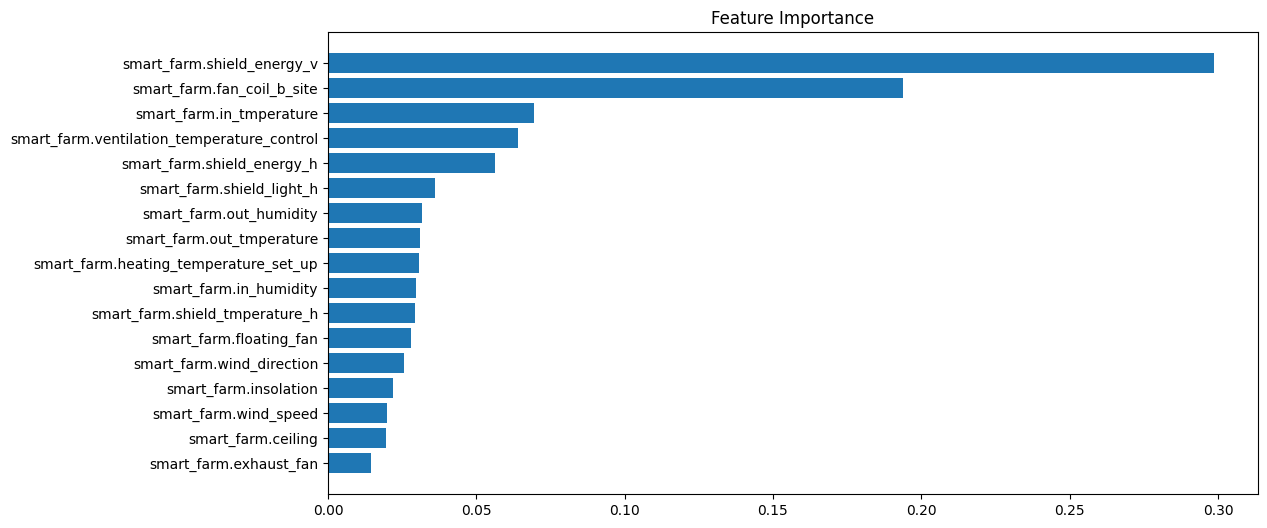

In [22]:
# normal

feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

Text(0.5, 1.0, 'Feature Importance')

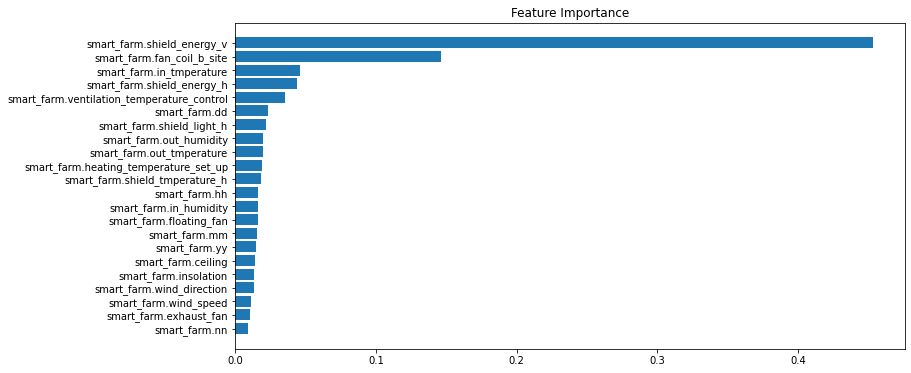

In [22]:
feature_importance = xgb_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_val.columns)[sorted_idx])
plt.title('Feature Importance')

In [44]:
pred_ = xgb_model.predict(X_test)
pred_                                # 1440개씩 평균지어

array([0.6974674 , 0.68916035, 0.69589037, ..., 0.73784685, 0.73784685,
       0.74873155], dtype=float32)

In [45]:
len(pred_)

18720

In [46]:
from scipy.stats import mode
mode(pred_)[0][0]

0.73784685

In [47]:
len(pred_)/1440

13.0

In [48]:
# 평균
pred = []
for i in range(int(len(pred_)/1440)):
    pred.append(np.mean(pred_[1440*i:1440*(i+1)]))
pred
len(pred)

## 최대값
pred1 = []
for i in range(int(len(pred_)/1440)):
    pred1.append(np.max(pred_[1440*i:1440*(i+1)]))
pred1
len(pred1)

## 최빈값
pred2 = []
for i in range(int(len(pred_)/1440)):
    pred2.append(mode(pred_[1440*i:1440*(i+1)])[0][0])
pred2
len(pred2)

## 최빈값
pred3 = []
for i in range(int(len(pred_)/1440)):
    pred3.append(np.median(pred_[1440*i:1440*(i+1)]))
pred3
len(pred3)

13

In [56]:
# # pred = lgbm_reg.predict(X_test)
# submission=pd.read_csv('1-1_검증데이터셋.csv', encoding='utf-8')
# submission1=submission.copy()
submission1['heat_supply_day2'] = pred
submission1 
submission1.to_csv("1.csv", index = False)            # 6위

In [55]:
submission1['heat_supply_day2'] = pred1
submission1
submission1.to_csv("farm_no_outlier_xgb_normal.csv", index = False)       # 4위 (max로 ㄱㄱ)

In [57]:
submission1['heat_supply_day2'] = pred2
submission1
submission1.to_csv("2.csv", index = False)       #6위

In [58]:
submission1['heat_supply_day2'] = pred3
submission1
submission1.to_csv("3.csv", index = False)       #6위

In [54]:
# lgbm 0.06/ xgb 0.19